In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


C:\Users\roger\AppData\Local\Temp\ipykernel_16752\2816518301.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Import and process the data

In [5]:
import pandas as pd

# Step 1: Load properly using comma delimiter
path = r'D:\A deep understanding of Deep Learning (with python)\FFN\mnist_train_small.csv'
df = pd.read_csv(path, header=None, delimiter=';')

# Step 2: Check full shape
print("Full DataFrame shape:", df.shape)  # Should be (20000, 785)

# Step 3: Split label and features
labels = df.iloc[:, 0].values
data = df.iloc[:, 1:].values

print("labels.shape:", labels.shape)      # (20000,)
print("data.shape:", data.shape)          # (20000, 784)

dataNorm=data/np.max(data)

Full DataFrame shape: (20001, 785)
labels.shape: (20001,)
data.shape: (20001, 784)


In [6]:
dataT=torch.tensor(dataNorm).float()
labelsT=torch.tensor(labels).long()
train_data, test_data, train_labels, test_labels = train_test_split(
        dataT, labelsT, test_size=.20)

train_data=TensorDataset(train_data,train_labels)

test_data=TensorDataset(test_data,test_labels)
batchsize=20
train_loader=DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def createModel():
    class theNet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(784, 64)
            self.fc1 = nn.Linear(64, 32)
            self.fc2 = nn.Linear(32, 32)
            self.output = nn.Linear(32, 10)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.output(x)

    net = theNet()
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    return net, lossfun, optimizer


In [15]:
def trainModel(net, lossfun, optimizer, train_loader, test_loader, epochs=20):
    trainLoss = []
    testLoss = []
    trainAcc = []
    testAcc = []

    for epoch in range(epochs):
        net.train()
        batchLoss = []
        batchAcc = []

        for X, y in train_loader:
            yHat = net(X)
            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            predictions = torch.argmax(yHat, dim=1)
            acc = 100 * torch.mean((predictions == y).float()).item()
            batchAcc.append(acc)

        trainLoss.append(sum(batchLoss)/len(batchLoss))
        trainAcc.append(sum(batchAcc)/len(batchAcc))

        # Evaluation on test set
        net.eval()
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)
            loss = lossfun(yHat, y)
            testLoss.append(loss.item())
            predictions = torch.argmax(yHat, dim=1)
            acc = 100 * torch.mean((predictions == y).float()).item()
            testAcc.append(acc)

    return trainLoss, testLoss, trainAcc, testAcc


In [16]:
net, lossfun, optimizer = createModel()
trainLoss, testLoss, trainAcc, testAcc = trainModel(net, lossfun, optimizer, train_loader, test_loader, epochs=20)


NameError: name 'trainLoss' is not defined

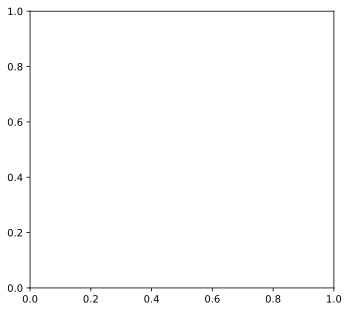

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(trainLoss, label='Train Loss')
plt.plot(testLoss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(trainAcc, label='Train Acc')
plt.plot(testAcc, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
